In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logomaker
import simplejson as json
import os
import math

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.size']=14
plt.rcParams['font.family']='Arial'


plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)

In [10]:
AA="GPAVLIMCFYWHKRQNEDST-"
AA2="GPAVLIMCFYWHKRQNEDST"

colors = {"DE": [0.80392, 0.12157,0.15294],
"KRH":[0.2549, 0.40392, 0.68627],
"STGCNQY":[0.39608, 0.4, 0.6],
"AVILFMWP":[0.63529,0.63137,0.45490],
         "x":[0,0,0]}

color_dict={}
for k,v in colors.items():
    for aa in k:
        color_dict[aa] = v


In [11]:
hum_T20 = json.load(open("ANARCI_Hum_H.json"))
hum = json.load(open("ANARCI_Hum_Full_H.json"))
nb = json.load(open("ANARCI_Nb_H.json"))

for k in ['72D','104A']:
    del hum_T20[k]
    del hum[k]
    del nb[k]
for k,v in zip(list(hum.keys()),list(hum.values())):
    if not "-" in v.keys():
        continue
    if v['-']>0.9:
        del hum[k]
for k,v in zip(list(nb.keys()),list(nb.values())):
    if not "-" in v.keys():
        continue
    if v['-']>0.9:
        del nb[k]

In [12]:
shared_keys = set(hum.keys())&set(nb.keys())
nb_entropies = dict()
for k,v in nb.items():
    if not k in shared_keys:
        continue
    entropy = 0
    for freq in v.values():
        entropy += -freq*math.log(freq)
    nb_entropies[k] = entropy
hum_entropies = dict()
for k,v in hum.items():
    if not k in shared_keys:
        continue
    entropy = 0
    for freq in v.values():
        entropy += -freq*math.log(freq)
    hum_entropies[k] = entropy


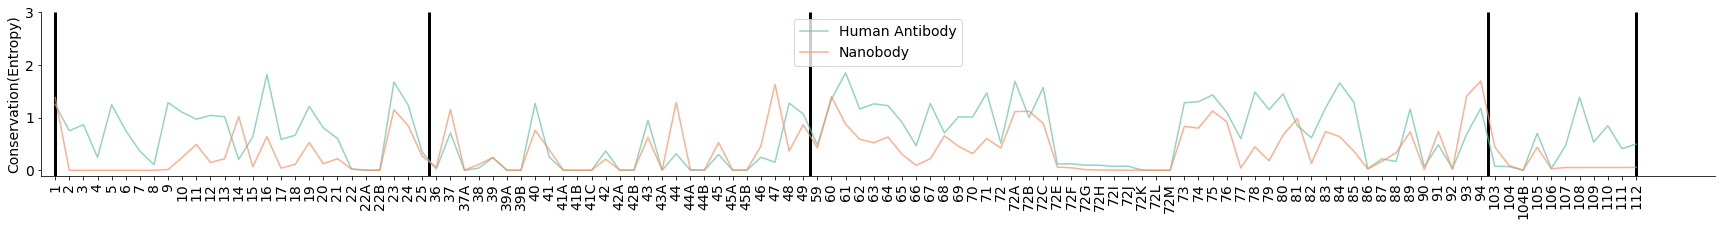

In [33]:
plt.figure(figsize=(30,3))
#plt.plot(nb_entropies.keys(),nb_entropies.values())
hum_idx_pos = list(hum_entropies.keys())
hum_cons = list(hum_entropies.values())
nb_cons =list(nb_entropies.values())
cdr1_start = hum_idx_pos.index("26")
cdr1_end = hum_idx_pos.index("35")+1

cdr2_start = hum_idx_pos.index("50")
cdr2_end = hum_idx_pos.index("58")+1

cdr3_start = hum_idx_pos.index("95")
cdr3_end = hum_idx_pos.index("102")+1

FR1_X = hum_idx_pos[:cdr1_start]
FR1_hum_Y = hum_cons[:cdr1_start]
FR1_nb_Y = nb_cons[:cdr1_start]



FR2_X = hum_idx_pos[cdr1_end:cdr2_start]
FR2_hum_Y = hum_cons[cdr1_end:cdr2_start]
FR2_nb_Y = nb_cons[cdr1_end:cdr2_start]



FR3_X = hum_idx_pos[cdr2_end:cdr3_start]
FR3_hum_Y = hum_cons[cdr2_end:cdr3_start]
FR3_nb_Y = nb_cons[cdr2_end:cdr3_start]



FR4_X = hum_idx_pos[cdr3_end:]
FR4_hum_Y = hum_cons[cdr3_end:]
FR4_nb_Y = nb_cons[cdr3_end:]

plt.plot(FR1_X+FR2_X+FR3_X+FR4_X,FR1_hum_Y+FR2_hum_Y+FR3_hum_Y+FR4_hum_Y,label='Human Antibody',alpha=0.7)
plt.plot(FR1_X+FR2_X+FR3_X+FR4_X,FR1_nb_Y+FR2_nb_Y+FR3_nb_Y+FR4_nb_Y,label='Nanobody',alpha=0.7)


#plt.plot(hun_idx_pos,nb_entropies.values(),label='VhH',alpha=0.7)
__x = plt.xticks(rotation=90)
plt.vlines(ymin=[-0.1,-0.1,-0.1,-.1,-.1],ymax=[3,3,3,3,3],x=[0,len(FR1_X)-0.5,len(FR1_X)+len(FR2_X)-0.5,len(FR1_X)+len(FR2_X)+len(FR3_X)-0.5,len(FR1_X)+len(FR2_X)+len(FR3_X)+len(FR4_X)-1],linestyles='solid',lw=3,color='black')
# plt.text(28,3.1,'CDR1',fontsize=18)
# plt.text(55,3.1,'CDR2',fontsize=18)
# plt.text(105,3.2,'CDR3',fontsize=18)
plt.ylim((-0.1,3))
plt.xlim(xmin=-1)
plt.ylabel("Conservation(Entropy)")
plt.legend(loc="upper center")
sns.despine()

plt.savefig("Conservation_AbVH_Nb_FR.svg")

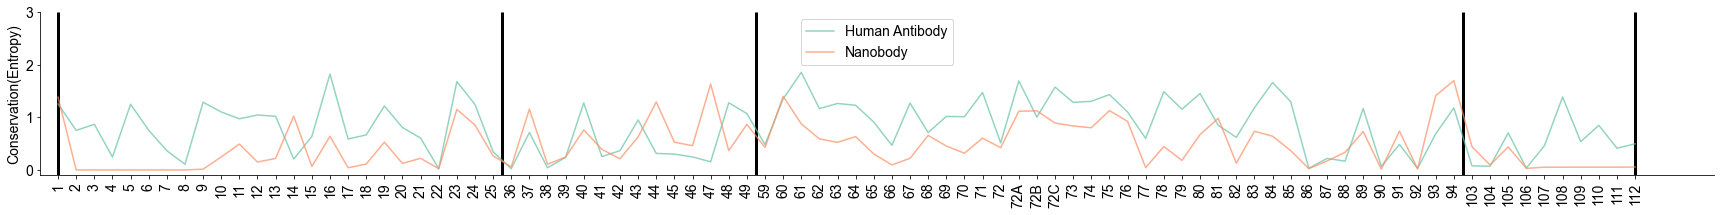

In [50]:
plt.figure(figsize=(30,3))
#plt.plot(nb_entropies.keys(),nb_entropies.values())
hum_idx_pos = list(hum_entropies.keys())
hum_cons = list(hum_entropies.values())
nb_cons =list(nb_entropies.values())
cdr1_start = hum_idx_pos.index("26")
cdr1_end = hum_idx_pos.index("35")+1

cdr2_start = hum_idx_pos.index("50")
cdr2_end = hum_idx_pos.index("58")+1

cdr3_start = hum_idx_pos.index("95")
cdr3_end = hum_idx_pos.index("102")+1

FR1_X = hum_idx_pos[:cdr1_start]
FR1_hum_Y = hum_cons[:cdr1_start]
FR1_nb_Y = nb_cons[:cdr1_start]



FR2_X = hum_idx_pos[cdr1_end:cdr2_start]
FR2_hum_Y = hum_cons[cdr1_end:cdr2_start]
FR2_nb_Y = nb_cons[cdr1_end:cdr2_start]



FR3_X = hum_idx_pos[cdr2_end:cdr3_start]
FR3_hum_Y = hum_cons[cdr2_end:cdr3_start]
FR3_nb_Y = nb_cons[cdr2_end:cdr3_start]



FR4_X = hum_idx_pos[cdr3_end:]
FR4_hum_Y = hum_cons[cdr3_end:]
FR4_nb_Y = nb_cons[cdr3_end:]

plt.plot(FR1_X+FR2_X+FR3_X+FR4_X,FR1_hum_Y+FR2_hum_Y+FR3_hum_Y+FR4_hum_Y,label='Human Antibody',alpha=0.7)
plt.plot(FR1_X+FR2_X+FR3_X+FR4_X,FR1_nb_Y+FR2_nb_Y+FR3_nb_Y+FR4_nb_Y,label='Nanobody',alpha=0.7)


#plt.plot(hun_idx_pos,nb_entropies.values(),label='VhH',alpha=0.7)
__x = plt.xticks(rotation=90)
plt.vlines(ymin=[-0.1,-0.1,-0.1,-.1,-.1],ymax=[3,3,3,3,3],x=[0,len(FR1_X)-0.5,len(FR1_X)+len(FR2_X)-0.5,len(FR1_X)+len(FR2_X)+len(FR3_X)-0.5,len(FR1_X)+len(FR2_X)+len(FR3_X)+len(FR4_X)-1],linestyles='solid',lw=3,color='black')
# plt.text(28,3.1,'CDR1',fontsize=18)
# plt.text(55,3.1,'CDR2',fontsize=18)
# plt.text(105,3.2,'CDR3',fontsize=18)
plt.ylim((-0.1,3))
plt.xlim(xmin=-1)
plt.ylabel("Conservation(Entropy)")
plt.legend(loc="upper center")
sns.despine()

plt.savefig("Conservation_AbVH_Nb_FR.svg")

In [15]:
shared_keys = set(hum_T20.keys())&set(nb.keys())
nb_entropies = dict()
for k,v in nb.items():
    if not k in shared_keys:
        continue
    entropy = 0
    for freq in v.values():
        entropy += -freq*math.log(freq)
    nb_entropies[k] = entropy
hum_entropies = dict()
for k,v in hum_T20.items():
    if not k in shared_keys:
        continue
    entropy = 0
    for freq in v.values():
        entropy += -freq*math.log(freq)
    hum_entropies[k] = entropy


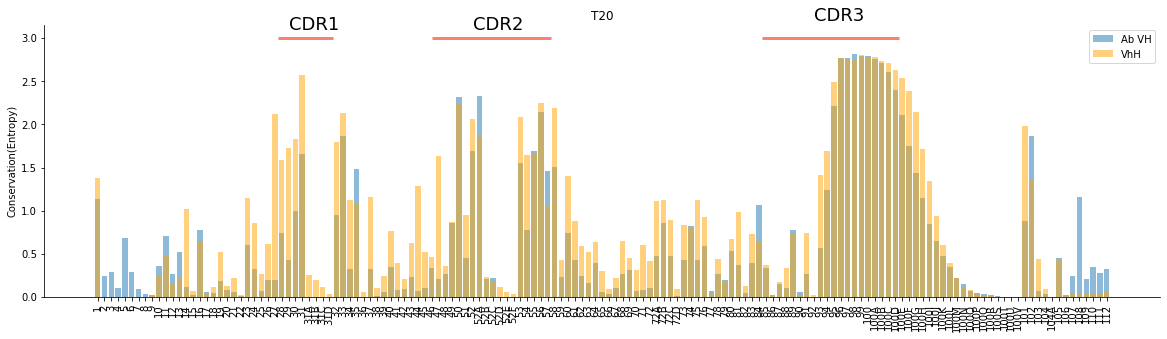

In [19]:
plt.figure(figsize=(20,3))
#plt.plot(nb_entropies.keys(),nb_entropies.values())
plt.bar(hum_entropies.keys(),hum_entropies.values(),label='Ab VH',alpha=0.5)
plt.bar(nb_entropies.keys(),nb_entropies.values(),label='VhH',alpha=0.5,color='orange')
__x = plt.xticks(rotation=90)
plt.hlines(xmin=[26.5,49,97.5],xmax=[34.5,66.5,117.5],y=[3,3,3],linestyles='solid',lw=3,color='salmon')
plt.text(28,3.1,'CDR1',fontsize=18)
plt.text(55,3.1,'CDR2',fontsize=18)
plt.text(105,3.2,'CDR3',fontsize=18)
plt.title("T20")
plt.ylabel("Conservation(Entropy)")
plt.legend()
sns.despine()

In [16]:
deleted_keys_hum = set(hum_T20.keys())-shared_keys
deleted_keys_nb = set(nb.keys())-shared_keys
for k in deleted_keys_hum:
    del hum_T20[k]
for k in deleted_keys_nb:
    del nb[k]


In [18]:
nb_matrix = np.zeros((20,len(shared_keys)))
for i,item in enumerate(nb.items()):
    k,v = item
    if not k in shared_keys:
        continue
    for j,aa in enumerate(AA2):
        if aa in v.keys():
            nb_matrix[j,i] = v[aa]
hum_matrix = np.zeros((20,len(shared_keys)))
for i,item in enumerate(hum_T20.items()):
    k,v = item
    if not k in shared_keys:
        continue
    for j,aa in enumerate(AA2):
        if aa in v.keys():
            hum_matrix[j,i] = v[aa]
        

In [19]:
matrix = nb_matrix-hum_matrix
df_matrix =pd.DataFrame(matrix,index=[a for a in AA2]).T

df_hum_matrix = pd.DataFrame(hum_matrix,index=[a for a in AA2]).T
df_nb_matrix = pd.DataFrame(nb_matrix,index=[a for a in AA2]).T

df_matrix_hum_spec = df_matrix.copy()
df_matrix_hum_spec[df_matrix_hum_spec>0]=0
df_matrix_hum_spec = -df_matrix_hum_spec

df_matrix_nb_spec = df_matrix.copy()
df_matrix_nb_spec[df_matrix_nb_spec<0]=0

nb_idx_pos = list(nb.keys())

In [20]:
cdr1_start = nb_idx_pos.index("26")
cdr1_end = nb_idx_pos.index("35")+1

cdr2_start = nb_idx_pos.index("50")
cdr2_end = nb_idx_pos.index("58")+1

cdr3_start = nb_idx_pos.index("95")
cdr3_end = nb_idx_pos.index("102")+1

In [21]:
x = df_matrix.copy()
y = df_matrix.copy()
x[x<0] = 0
y[y>0] = 0
y= -y

In [22]:
np.array(nb_idx_pos)[np.where(np.abs((df_nb_matrix[:cdr1_start] - df_hum_matrix[:cdr1_start])).sum(1)>1)[0]+1]

array(['15'], dtype='<U4')

In [255]:
fr1_entichment=100*(np.abs((df_nb_matrix[:cdr1_start] - df_hum_matrix[:cdr1_start])).sum(1)>1).mean()

In [233]:
np.array(nb_idx_pos)[np.where(np.abs((df_nb_matrix[cdr1_end:cdr2_start] - df_hum_matrix[cdr1_end:cdr2_start])).sum(1)>1)[0]+cdr1_end]

array(['37', '44', '45', '47'], dtype='<U4')

In [250]:
fr2_entichment=100*(np.abs((df_nb_matrix[cdr1_end:cdr2_start] - df_hum_matrix[cdr1_end:cdr2_start])).sum(1)>1).mean()

In [235]:
np.array(nb_idx_pos)[np.where(np.abs((df_nb_matrix[cdr2_end:cdr3_start]-df_hum_matrix[cdr2_end:cdr3_start])).sum(1)>1)[0]+cdr2_end]

array(['72B', '75', '83', '84', '94'], dtype='<U4')

In [247]:
fr3_entichment=100*(np.abs((df_nb_matrix[cdr2_end:cdr3_start] - df_hum_matrix[cdr2_end:cdr3_start])).sum(1)>1).mean()

In [239]:
np.array(nb_idx_pos)[np.where(np.abs((df_nb_matrix[cdr3_end:]-df_hum_matrix[cdr3_end:])).sum(1)>1)[0]+cdr3_end]

array(['108'], dtype='<U4')

In [249]:
fr4_entichment=100*(np.abs((df_nb_matrix[cdr3_end:] - df_hum_matrix[cdr3_end:])).sum(1)>1).mean()

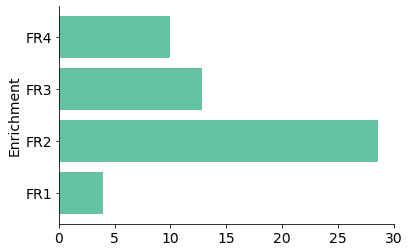

In [279]:
plt.barh(y=['FR1','FR2','FR3','FR4'],width=[fr1_entichment,fr2_entichment,fr3_entichment,fr4_entichment])
plt.ylabel("Enrichment")
sns.despine()
plt.savefig("Enrichment.svg",format='svg')

In [284]:
[fr1_entichment,fr2_entichment,fr3_entichment,fr4_entichment]

[4.0, 28.57142857142857, 12.82051282051282, 10.0]

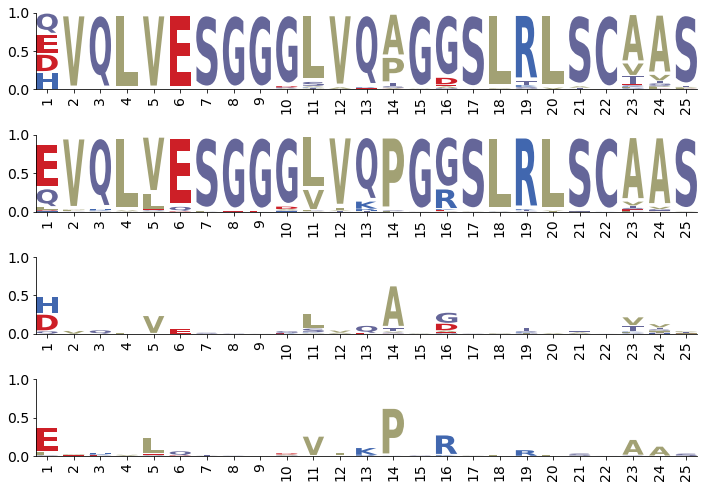

In [280]:
fig = plt.figure(figsize=(cdr1_start*0.4,7))
ax1 = fig.add_subplot(411)
logomaker.Logo(df_nb_matrix[:cdr1_start],color_scheme=color_dict,vpad=.1,width=.8,ax=ax1)
ax1.set_xticks(df_nb_matrix[:cdr1_start].index)
ax1.set_xticklabels(nb_idx_pos[:cdr1_start],rotation=90)

# ax1.hlines(xmin=[26.5,49],xmax=[34.5,66.5],y=[0.9,0.9],linestyles='solid',lw=3,color='salmon')
# ax1.text(28,0.95,'CDR1',fontsize=18)
# ax1.text(55,0.95,'CDR2',fontsize=18)
sns.despine()
ax2 = fig.add_subplot(412)
logomaker.Logo(df_hum_matrix[:cdr1_start],color_scheme=color_dict,vpad=.1,width=.8,ax=ax2)
ax2.set_xticks(df_hum_matrix[:cdr1_start].index)
ax2.set_xticklabels(nb_idx_pos[:cdr1_start],rotation=90)
#ax2.hlines(xmin=97.5,xmax=117.5,y=[0.9,0.9],linestyles='solid',lw=3,color='salmon')
#ax2.text(105,0.95,'CDR3',fontsize=18)
sns.despine()
ax3 = fig.add_subplot(413)
logomaker.Logo(df_matrix_nb_spec[:cdr1_start],color_scheme=color_dict,vpad=.1,width=.8,ax=ax3)
ax3.set_xticks(df_matrix_nb_spec[:cdr1_start].index)
ax3.set_xticklabels(nb_idx_pos[:cdr1_start],rotation=90)
sns.despine()


ax4 = fig.add_subplot(414)
logomaker.Logo(df_matrix_hum_spec[:cdr1_start],color_scheme=color_dict,vpad=.1,width=.8,ax=ax4)
ax4.set_xticks(df_matrix_hum_spec[:cdr1_start].index)
ax4.set_xticklabels(nb_idx_pos[:cdr1_start],rotation=90)
sns.despine()


ax1.set_ylim((0,1))
ax2.set_ylim((0,1))
ax3.set_ylim((0,1))
ax4.set_ylim((0,1))

fig.tight_layout()
plt.savefig("FR1_logo.svg")


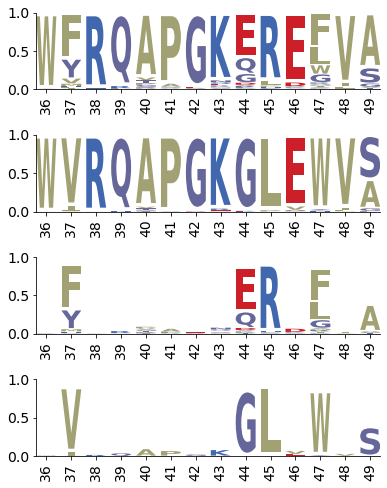

In [281]:
fig = plt.figure(figsize=((cdr2_start-cdr1_end)*0.4,7))
ax1 = fig.add_subplot(411)
logomaker.Logo(df_nb_matrix[cdr1_end:cdr2_start],color_scheme=color_dict,vpad=.1,width=.8,ax=ax1)
ax1.set_xticks(df_nb_matrix[cdr1_end:cdr2_start].index)
ax1.set_xticklabels(nb_idx_pos[cdr1_end:cdr2_start],rotation=90)

# ax1.hlines(xmin=[26.5,49],xmax=[34.5,66.5],y=[0.9,0.9],linestyles='solid',lw=3,color='salmon')
# ax1.text(28,0.95,'CDR1',fontsize=18)
# ax1.text(55,0.95,'CDR2',fontsize=18)
sns.despine()
ax2 = fig.add_subplot(412)
logomaker.Logo(df_hum_matrix[cdr1_end:cdr2_start],color_scheme=color_dict,vpad=.1,width=.8,ax=ax2)
ax2.set_xticks(df_hum_matrix[cdr1_end:cdr2_start].index)
ax2.set_xticklabels(nb_idx_pos[cdr1_end:cdr2_start],rotation=90)
#ax2.hlines(xmin=97.5,xmax=117.5,y=[0.9,0.9],linestyles='solid',lw=3,color='salmon')
#ax2.text(105,0.95,'CDR3',fontsize=18)
sns.despine()
ax3 = fig.add_subplot(413)
logomaker.Logo(df_matrix_nb_spec[cdr1_end:cdr2_start],color_scheme=color_dict,vpad=.1,width=.8,ax=ax3)
ax3.set_xticks(df_matrix_nb_spec[cdr1_end:cdr2_start].index)
ax3.set_xticklabels(nb_idx_pos[cdr1_end:cdr2_start],rotation=90)
sns.despine()

ax4 = fig.add_subplot(414)
logomaker.Logo(df_matrix_hum_spec[cdr1_end:cdr2_start],color_scheme=color_dict,vpad=.1,width=.8,ax=ax4)
ax4.set_xticks(df_matrix_hum_spec[cdr1_end:cdr2_start].index)
ax4.set_xticklabels(nb_idx_pos[cdr1_end:cdr2_start],rotation=90)
sns.despine()

ax1.set_ylim((0,1))
ax2.set_ylim((0,1))
ax3.set_ylim((0,1))
ax4.set_ylim((0,1))

fig.tight_layout()
plt.savefig("FR2_logo.svg")



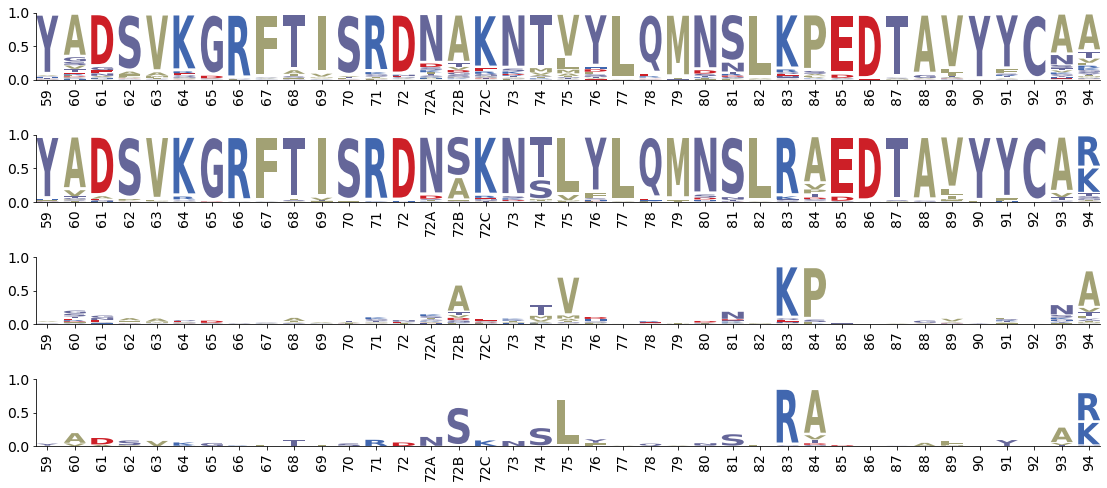

In [282]:
fig = plt.figure(figsize=((cdr3_start-cdr2_end)*0.4,7))
ax1 = fig.add_subplot(411)
logomaker.Logo(df_nb_matrix[cdr2_end:cdr3_start],color_scheme=color_dict,vpad=.1,width=.8,ax=ax1)
ax1.set_xticks(df_nb_matrix[cdr2_end:cdr3_start].index)
ax1.set_xticklabels(nb_idx_pos[cdr2_end:cdr3_start],rotation=90)

# ax1.hlines(xmin=[26.5,49],xmax=[34.5,66.5],y=[0.9,0.9],linestyles='solid',lw=3,color='salmon')
# ax1.text(28,0.95,'CDR1',fontsize=18)
# ax1.text(55,0.95,'CDR2',fontsize=18)
sns.despine()
ax2 = fig.add_subplot(412)
logomaker.Logo(df_hum_matrix[cdr2_end:cdr3_start],color_scheme=color_dict,vpad=.1,width=.8,ax=ax2)
ax2.set_xticks(df_hum_matrix[cdr2_end:cdr3_start].index)
ax2.set_xticklabels(nb_idx_pos[cdr2_end:cdr3_start],rotation=90)
#ax2.hlines(xmin=97.5,xmax=117.5,y=[0.9,0.9],linestyles='solid',lw=3,color='salmon')
#ax2.text(105,0.95,'CDR3',fontsize=18)
sns.despine()
ax3 = fig.add_subplot(413)
logomaker.Logo(df_matrix_nb_spec[cdr2_end:cdr3_start],color_scheme=color_dict,vpad=.1,width=.8,ax=ax3)
ax3.set_xticks(df_matrix_nb_spec[cdr2_end:cdr3_start].index)
ax3.set_xticklabels(nb_idx_pos[cdr2_end:cdr3_start],rotation=90)
sns.despine()

ax4 = fig.add_subplot(414)
logomaker.Logo(df_matrix_hum_spec[cdr2_end:cdr3_start],color_scheme=color_dict,vpad=.1,width=.8,ax=ax4)
ax4.set_xticks(df_matrix_hum_spec[cdr2_end:cdr3_start].index)
ax4.set_xticklabels(nb_idx_pos[cdr2_end:cdr3_start],rotation=90)
sns.despine()

ax1.set_ylim((0,1))
ax2.set_ylim((0,1))
ax3.set_ylim((0,1))
ax4.set_ylim((0,1))

fig.tight_layout()
plt.savefig("FR3_logo.svg")


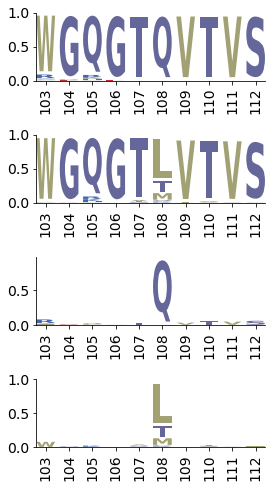

In [283]:
fig = plt.figure(figsize=((len(nb_idx_pos)-cdr3_end)*0.4,7))
ax1 = fig.add_subplot(411)
logomaker.Logo(df_nb_matrix[cdr3_end:],color_scheme=color_dict,vpad=.1,width=.8,ax=ax1)
ax1.set_xticks(df_nb_matrix[cdr3_end:].index)
ax1.set_xticklabels(nb_idx_pos[cdr3_end:],rotation=90)

# ax1.hlines(xmin=[26.5,49],xmax=[34.5,66.5],y=[0.9,0.9],linestyles='solid',lw=3,color='salmon')
# ax1.text(28,0.95,'CDR1',fontsize=18)
# ax1.text(55,0.95,'CDR2',fontsize=18)
sns.despine()
ax2 = fig.add_subplot(412)
logomaker.Logo(df_hum_matrix[cdr3_end:],color_scheme=color_dict,vpad=.1,width=.8,ax=ax2)
ax2.set_xticks(df_hum_matrix[cdr3_end:].index)
ax2.set_xticklabels(nb_idx_pos[cdr3_end:],rotation=90)
#ax2.hlines(xmin=97.5,xmax=117.5,y=[0.9,0.9],linestyles='solid',lw=3,color='salmon')
#ax2.text(105,0.95,'CDR3',fontsize=18)
sns.despine()
ax3 = fig.add_subplot(413)
logomaker.Logo(df_matrix_nb_spec[cdr3_end:],color_scheme=color_dict,vpad=.1,width=.8,ax=ax3)
ax3.set_xticks(df_matrix_nb_spec[cdr3_end:].index)
ax3.set_xticklabels(nb_idx_pos[cdr3_end:],rotation=90)
sns.despine()

ax3 = fig.add_subplot(414)
logomaker.Logo(df_matrix_hum_spec[cdr3_end:],color_scheme=color_dict,vpad=.1,width=.8,ax=ax3)
ax3.set_xticks(df_matrix_hum_spec[cdr3_end:].index)
ax3.set_xticklabels(nb_idx_pos[cdr3_end:],rotation=90)
sns.despine()

ax1.set_ylim((0,1))
ax2.set_ylim((0,1))
ax3.set_ylim((0,1))
ax4.set_ylim((0,1))

fig.tight_layout()
plt.savefig("FR4_logo.svg")





In [281]:
def parseNumberedNb(file):
    Pos =[]
    AA = []
    with open(file) as f:
        for line in f:
            items = line.rstrip().split(" ")
            if items[-1] =='-':
                continue
            if items[1]=='113':
                break
            Pos.append("".join(items[1:-1]))
            AA.append(items[-1])
    #Pos = np.array(Pos)
    #AA = np.array(AA)
    return (Pos,AA)

In [362]:
def getProfileForNb(Pos,AA,hum_profile,freq_threshold):
    cdr_pos = Pos[Pos.index("26"):Pos.index('35')+1] + Pos[Pos.index("50"):Pos.index('58')+1] + Pos[Pos.index("93"):Pos.index('102')+1]
    freqs = []
    labels = []
    substitutions = []
    for idx,(pos,aa) in enumerate(zip(Pos,AA)):
        if pos in hum_profile.keys() and aa in hum_profile[pos].keys():
            freqs.append(float(hum_profile[pos][aa]))
        else:
            freqs.append(np.min(list(hum_profile[pos].values())))
        if pos in cdr_pos:
            labels.append(-1)
            substitutions.append("")
            
        else:
            if freqs[idx]==None or freqs[idx] >=freq_threshold:
                labels.append(0)
                substitutions.append("")
            else:
                labels.append(1)
                substitution = next(iter(hum_T20[pos].keys()))
                substitutions.append(substitution)
                        
    return (freqs,labels,substitutions)        
def parseIntraInteractions(*files):
    interacting_res = set()
    for file in files:
        interaction = pd.read_csv(file)
        for _pos in interaction[' idRES1 ']:
            interacting_res.add(int(_pos))
        for _pos in interaction[' idRES2 ']:
            interacting_res.add(int(_pos))
    return interacting_res

def humanize(numbered_file,pdb_file,freq_threshold=0.2):
    pos,aa = parseNumberedNb(numbered_file)
    freqs,labels,substitutions = getProfileForNb(pos,aa,hum_T20,freq_threshold)
    interaction_files = [f"{pdb_file}_aroaro.csv",f"{pdb_file}_catpi.csv",f"{pdb_file}_ionic.csv"]
    interacting_res = parseIntraInteractions(*interaction_files)
    df = pd.DataFrame({"pos":pos,"aa":aa,"freq":freqs,"label":labels,"sub":substitutions})
    df['idx'] = np.arange(1,df.shape[0]+1)
    df['intra'] = df['idx'].apply(lambda x: int(x in interacting_res))
    df['humanized'] = df.apply(lambda x: 1 if x['label']==1 and x['intra']==0 else 0,1)
    df['humanized_aa'] = df.apply(lambda x: x['sub'] if x['humanized']==1 else x['aa'],1)
    return "".join(df['aa'].values),df,"".join(df['humanized_aa'].values)
    

In [167]:
pos=[]
aas=[]
with open("Nb20.txt") as f:
    for l in f:
        items = l.rstrip().split(" ")
        if items[-1] =='-':
            continue
        pos.append(items[1])
        aas.append(items[-1])
del pos[-1]
del aas[-1]

In [190]:
Nb20_matrix = hum_matrix.copy()

In [191]:
selected_keys = [ i for i in hum_T20.keys() if i in pos]

In [192]:
selected_key_ind = []
for ind,k in enumerate(hum_T20.keys()):
    if k in pos:
        selected_key_ind.append(ind)

In [193]:
freq=[]
colors=[]
cdr_pos = pos[pos.index("28"):pos.index('35')+1] + pos[pos.index("50"):pos.index('58')+1] + pos[pos.index("93"):pos.index('102')+1]
for p,a in zip(pos,aas):
    f = 0
    if p in hum_T20.keys() and a in hum_T20[p].keys():
        f = 1-hum_T20[p][a]
    else:
        f = 1
    freq.append(f)
    
    if p in cdr_pos:
        colors.append('gray')
    else:
        if f <=0.8:
            colors.append('blue')
        else:
            colors.append('orange')


In [194]:
substition_canndidates = []
for p,a,c in zip(pos,aas,colors):
    if c =='orange':
        _aa = next(iter(hum_T20[p].keys()))
        _freq = next(iter(hum_T20[p].values()))
        substition_canndidates.append((p,_aa,_freq))
        #print((p,a,c))
        #print("------------------")

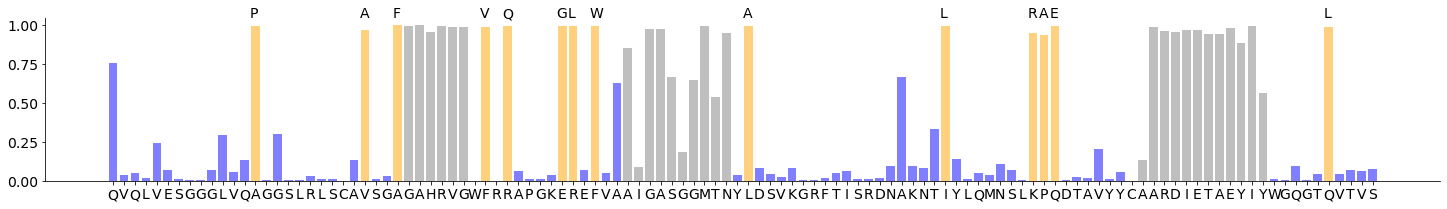

In [175]:
plt.figure(figsize=(25,3))
plt.bar(x=np.arange(len(freq)), height=freq,tick_label=aas,color=colors,alpha=0.5)
#plt.hlines(xmin=0,xmax=119,y=0.8)
for p,aa,f in substition_canndidates:
    ind = pos.index(p)
    plt.text(ind-0.5,1.05,aa)
sns.despine()
plt.savefig("pipeline1.svg",format='svg')

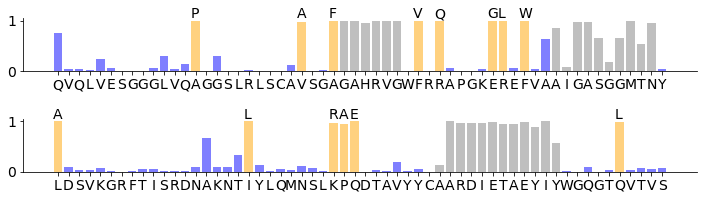

In [195]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(10,3))
axes[0].bar(x=np.arange(len(freq))[:58], height=freq[:58],tick_label=aas[:58],color=colors[:58],alpha=0.5)
axes[1].bar(x=np.arange(len(freq))[58:], height=freq[58:],tick_label=aas[58:],color=colors[58:],alpha=0.5)

#plt.hlines(xmin=0,xmax=119,y=0.8)
for p,aa,f in substition_canndidates:
    ind = pos.index(p)
    if ind <58:
        axes[0].text(ind-0.5,1.05,aa)
    else:
        axes[1].text(ind-0.5,1.05,aa)
sns.despine()
plt.tight_layout()
plt.savefig("pipeline1.svg",format='svg')

In [176]:
Nb20_ionic = pd.read_csv("/Users/zhesang/protinter/Nb20_ionic.csv")
Nb20_catpi = pd.read_csv("/Users/zhesang/protinter/Nb20_cationpi.csv")
Nb20_aroaro = pd.read_csv("/Users/zhesang/protinter/Nb20_aroaro.csv")

In [177]:
electrostatic_aa_pos = set()
for _pos in Nb20_ionic[' idRES1 ']:
    electrostatic_aa_pos.add(int(_pos))
for _pos in Nb20_ionic[' idRES2 ']:
    electrostatic_aa_pos.add(int(_pos))
for _pos in Nb20_catpi[' idRES1 ']:
    electrostatic_aa_pos.add(int(_pos))
for _pos in Nb20_catpi[' idRES2 ']:
    electrostatic_aa_pos.add(int(_pos))
for _pos in Nb20_aroaro[' idRES1 ']:
    electrostatic_aa_pos.add(int(_pos))
for _pos in Nb20_aroaro[' idRES2 ']:
    electrostatic_aa_pos.add(int(_pos))

In [178]:
for _pos in electrostatic_aa_pos:
    if colors[_pos-1]=='orange':
        colors[_pos-1]='red'
        

In [286]:
"".join(aas)

'QVQLVESGGGLVQAGGSLRLSCAVSGAGAHRVGWFRRAPGKEREFVAAIGASGGMTNYLDSVKGRFTISRDNAKNTIYLQMNSLKPQDTAVYYCAARDIETAEYIYWGQGTQVTVS'

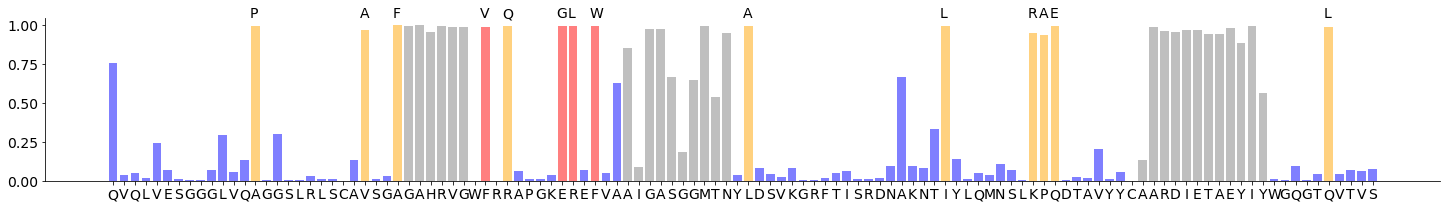

In [179]:
plt.figure(figsize=(25,3))
plt.bar(x=np.arange(len(freq)), height=freq,tick_label=aas,color=colors,alpha=0.5)
#plt.hlines(xmin=0,xmax=119,y=0.8)
for p,aa,f in substition_canndidates:
    ind = pos.index(p)
    plt.text(ind-0.5,1.05,aa)
sns.despine()
plt.savefig("pipeline2.svg",format='svg')

In [187]:
len(freq)/2

58.0

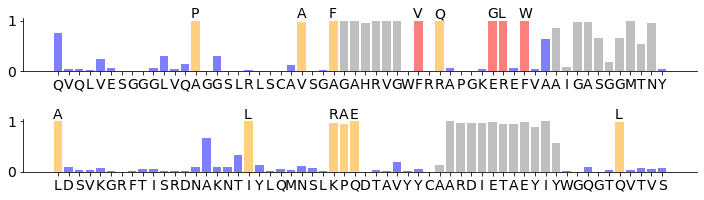

In [189]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(10,3))
axes[0].bar(x=np.arange(len(freq))[:58], height=freq[:58],tick_label=aas[:58],color=colors[:58],alpha=0.5)
axes[1].bar(x=np.arange(len(freq))[58:], height=freq[58:],tick_label=aas[58:],color=colors[58:],alpha=0.5)

#plt.hlines(xmin=0,xmax=119,y=0.8)
for p,aa,f in substition_canndidates:
    ind = pos.index(p)
    if ind <58:
        axes[0].text(ind-0.5,1.05,aa)
    else:
        axes[1].text(ind-0.5,1.05,aa)
sns.despine()
plt.tight_layout()
plt.savefig("pipeline2.svg",format='svg')

## Nb97

In [384]:
pos=[]
aas=[]
with open("Nb97.txt") as f:
    for l in f:
        items = l.rstrip().split(" ")
        if items[-1] =='-':
            continue
        pos.append("".join(items[1:-1]))
        aas.append(items[-1])

In [386]:
Nb97_matrix = hum_matrix.copy()
selected_keys = [ i for i in hum_T20.keys() if i in pos]
selected_key_ind = []
for ind,k in enumerate(hum_T20.keys()):
    if k in pos:
        selected_key_ind.append(ind)

In [387]:
freq=[]
colors=[]
cdr_pos = pos[pos.index("28"):pos.index('35')+1] + pos[pos.index("50"):pos.index('58')+1] + pos[pos.index("93"):pos.index('102')+1]
for p,a in zip(pos,aas):
    f = 0
    if p in hum_T20.keys() and a in hum_T20[p].keys():
        f = 1-hum_T20[p][a]
    else:
        f = 1
    freq.append(f)
    
    if p in cdr_pos:
        colors.append('gray')
    else:
        if f <=0.8:
            colors.append('blue')
        else:
            colors.append('orange')


In [388]:
substition_canndidates = []
for p,a,c in zip(pos,aas,colors):
    if c =='orange':
        _aa = next(iter(hum_T20[p].keys()))
        _freq = next(iter(hum_T20[p].values()))
        substition_canndidates.append((p,_aa,_freq))
        #print((p,a,c))
        #print("------------------")

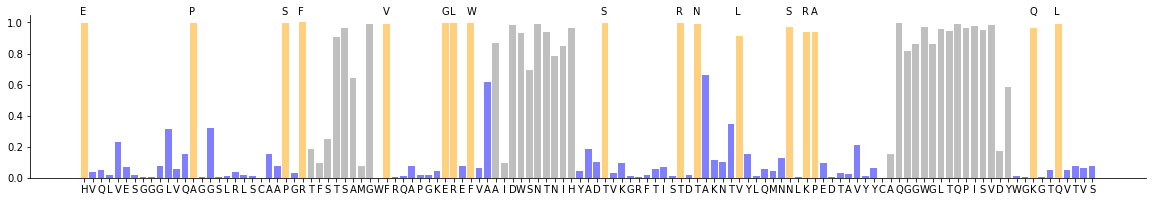

In [390]:
plt.figure(figsize=(20,3))
plt.bar(x=np.arange(len(freq)), height=freq,tick_label=aas,color=colors,alpha=0.5)
#plt.hlines(xmin=0,xmax=119,y=0.8)
for p,aa,f in substition_canndidates:
    ind = pos.index(p)
    plt.text(ind-0.5,1.05,aa)
sns.despine()

In [391]:
Nb97_ionic = pd.read_csv("/Users/zhesang/protinter/Nb97_ionic.csv")
Nb97_catpi = pd.read_csv("/Users/zhesang/protinter/Nb97_cationpi.csv")
Nb97_aroaro = pd.read_csv("/Users/zhesang/protinter/Nb97_aroaro.csv")
electrostatic_aa_pos = set()
for _pos in Nb97_ionic[' idRES1 ']:
    electrostatic_aa_pos.add(int(_pos))
for _pos in Nb97_ionic[' idRES2 ']:
    electrostatic_aa_pos.add(int(_pos))
for _pos in Nb97_catpi[' idRES1 ']:
    electrostatic_aa_pos.add(int(_pos))
for _pos in Nb97_catpi[' idRES2 ']:
    electrostatic_aa_pos.add(int(_pos))
for _pos in Nb97_aroaro[' idRES1 ']:
    electrostatic_aa_pos.add(int(_pos))
for _pos in Nb97_aroaro[' idRES2 ']:
    electrostatic_aa_pos.add(int(_pos))

In [392]:
for _pos in electrostatic_aa_pos:
    if colors[_pos-1]=='orange':
        colors[_pos-1]='red'
        

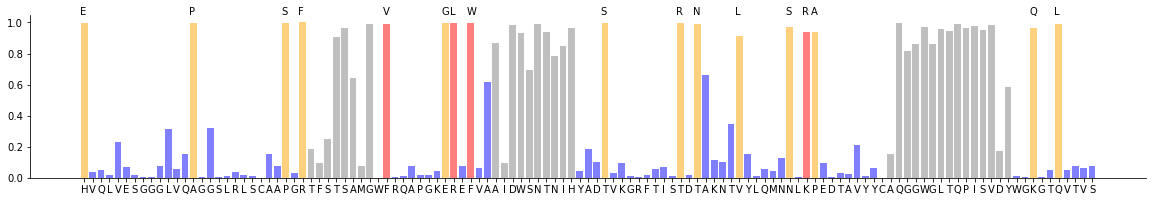

In [393]:
plt.figure(figsize=(20,3))
plt.bar(x=np.arange(len(freq)), height=freq,tick_label=aas,color=colors,alpha=0.5)
#plt.hlines(xmin=0,xmax=119,y=0.8)
for p,aa,f in substition_canndidates:
    ind = pos.index(p)
    plt.text(ind-0.5,1.05,aa)
sns.despine()

## Nb17

EVQLVESGGGLVQPGGSLRLSCAASGSIFSSNAMSWYRQAPGKGREWVASITSGGNADYADSVKGRFTISRDKNTLYLQMNSLRAEDTAVYYCHAVGQEASAYAPRAYWGQGTLVTVS


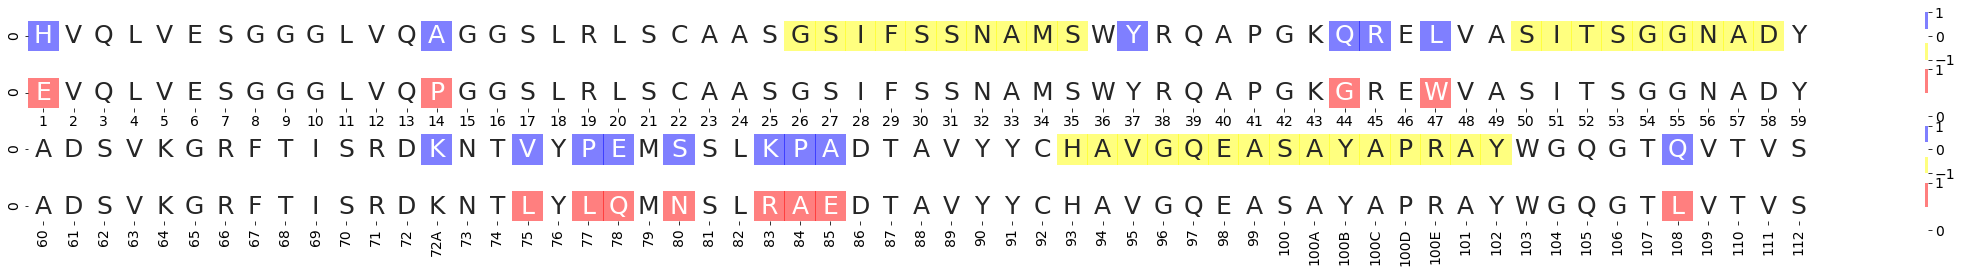

In [392]:
for threshold in [0.1]:
    orginal,humanize_data,humanized_version = humanize("Humanization_RBDNbs/Nb17.txt","Humanization_RBDNbs/Nb17.pdb",threshold)

    fig,axes = plt.subplots(nrows=4,ncols=1,figsize=(40,4))
    heatmap_width = int(np.ceil(humanize_data.shape[0]/2))
    sns.heatmap(humanize_data['label'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[0],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp2,
                vmax=1,vmin=0,
                ax=axes[1],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[:heatmap_width])

    sns.heatmap(humanize_data['label'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[2],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp2,vmax=1,vmin=0,
                ax=axes[3],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[heatmap_width:])
    plt.savefig(f"Humanization_RBDNbs/Nb17_{threshold}.svg",format='svg')
    print(humanized_version)


## Nb21

QVQLVESGGGLVQPGGSLRLSCAASGLGAHRVGWFRRAPGKEREFVAAIGANGGNTNYADSVKGRFTISRDNAKNTLYLQMNSLRAEDTAVYYCAARDIETAEYTYWGQGTLVTVS


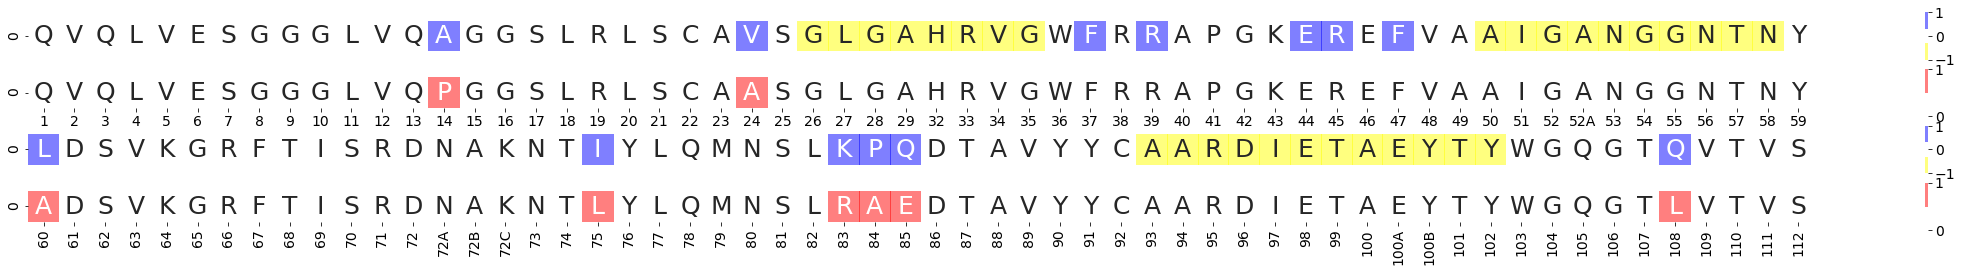

In [387]:
for threshold in [0.1]:
    orginal,humanize_data,humanized_version = humanize("Humanization_RBDNbs/Nb21.txt","Humanization_RBDNbs/Nb21.pdb",threshold)

    fig,axes = plt.subplots(nrows=4,ncols=1,figsize=(40,4))
    heatmap_width = int(np.ceil(humanize_data.shape[0]/2))
    sns.heatmap(humanize_data['label'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[0],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp2,
                vmax=1,vmin=0,
                ax=axes[1],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[:heatmap_width])

    sns.heatmap(humanize_data['label'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[2],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp2,vmax=1,vmin=0,
                ax=axes[3],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[heatmap_width:])
    plt.savefig(f"Humanization_RBDNbs/Nb21_{threshold}.svg",format='svg')
    print(humanized_version)




## Nb64

QVQLVESGGGLVQPGGSLRLSCAASGRTFSIAGMGWFRQAPGKGREFVSGITWNDGTTWYADSVKGRFTISRDNAKNTLYLQMNSLKAEDTAVYYCAAGPRLGSTPRAYDYWGQGTLVTVS


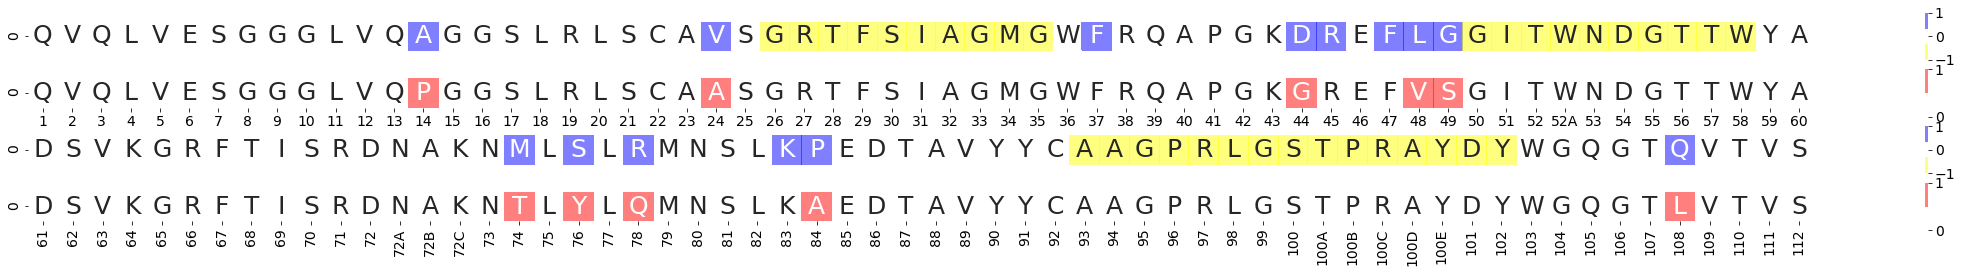

In [393]:
for threshold in [0.1]:
    orginal,humanize_data,humanized_version = humanize("Humanization_RBDNbs/Nb64.txt","Humanization_RBDNbs/Nb64.pdb",threshold)

    fig,axes = plt.subplots(nrows=4,ncols=1,figsize=(40,4))
    heatmap_width = int(np.ceil(humanize_data.shape[0]/2))
    sns.heatmap(humanize_data['label'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[0],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp2,
                vmax=1,vmin=0,
                ax=axes[1],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[:heatmap_width])

    sns.heatmap(humanize_data['label'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[2],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp2,vmax=1,vmin=0,
                ax=axes[3],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[heatmap_width:])
    plt.savefig(f"Humanization_RBDNbs/Nb64_{threshold}.svg",format='svg')
    print(humanized_version)





## Nb9

EVQLVESGGGLVQPGGSLRLSCAFSGYTFSTFPTAWFRQAPGKGREFVAGIRWNGGSRDYTEYADFVKGRFTISRDNAKNTLYLQMNSLKAEDTALYYCAASHGVVDGTSVNGYRYWGQGTLVTVS


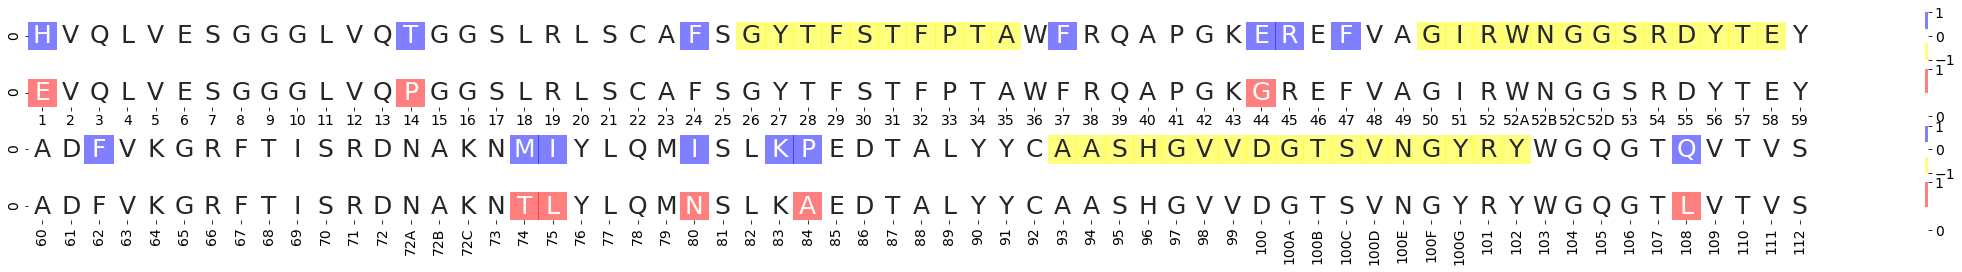

In [398]:
for threshold in [0.1]:
    orginal,humanize_data,humanized_version = humanize("Humanization_RBDNbs/Nb9.txt","Humanization_RBDNbs/Nb9.pdb",threshold)

    fig,axes = plt.subplots(nrows=4,ncols=1,figsize=(40,4))
    heatmap_width = int(np.ceil(humanize_data.shape[0]/2))
    sns.heatmap(humanize_data['label'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[0],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp2,
                vmax=1,vmin=0,
                ax=axes[1],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[:heatmap_width])

    sns.heatmap(humanize_data['label'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[2],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp2,vmax=1,vmin=0,
                ax=axes[3],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[heatmap_width:])
    plt.savefig(f"Humanization_RBDNbs/Nb9_{threshold}.svg",format='svg')
    print(humanized_version)





## Nb34

EVQLVESGGGLVQPGGSLRLSCAASGFTFSNYVMYWVRQAPGKGREWVSGIDSDGSDTAYADSVKGRFTISRDNAKNTLYLQMNSLKAEDTALYYCVKSKDPYGSPWTRSEFDDYWGQGTLVTVS


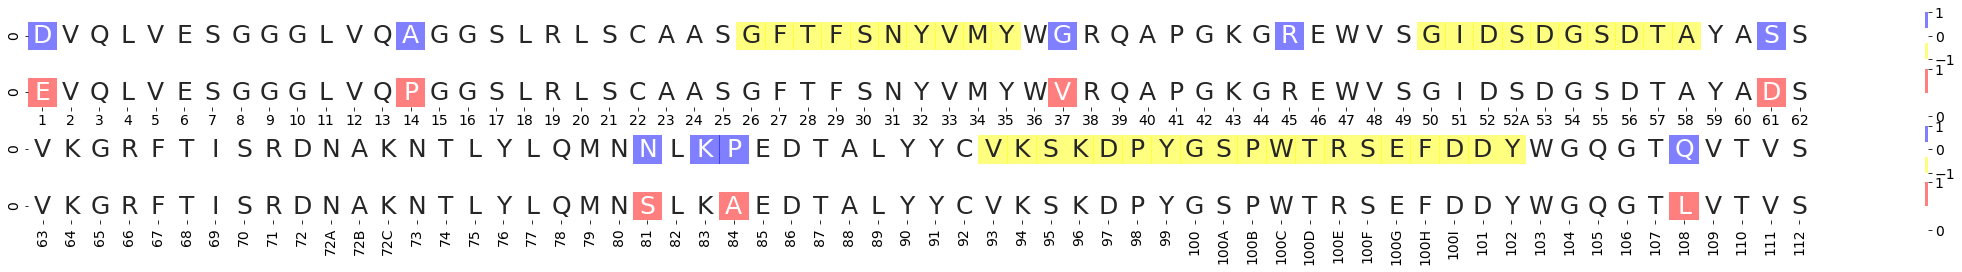

In [388]:
for threshold in [0.1]:
    orginal,humanize_data,humanized_version = humanize("Humanization_RBDNbs/Nb34.txt","Humanization_RBDNbs/Nb34.pdb",threshold)

    fig,axes = plt.subplots(nrows=4,ncols=1,figsize=(40,4))
    heatmap_width = int(np.ceil(humanize_data.shape[0]/2))
    sns.heatmap(humanize_data['label'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[0],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp2,
                vmax=1,vmin=0,
                ax=axes[1],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[:heatmap_width])

    sns.heatmap(humanize_data['label'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[2],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp2,vmax=1,vmin=0,
                ax=axes[3],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[heatmap_width:])
    plt.savefig(f"Humanization_RBDNbs/Nb34_{threshold}.svg",format='svg')
    print(humanized_version)



## Nb95

QVQLVESGGGLVQPGGSLRLSCAASGRTFSSYSMGWFRQAPGKEREFVATINGNGRDTYYADSVKGRFTISRDDAKNTLYLQMNSLKAEDTAVYYCAADKDVYYGYTSFPNEYEYWGQGTLVTVS


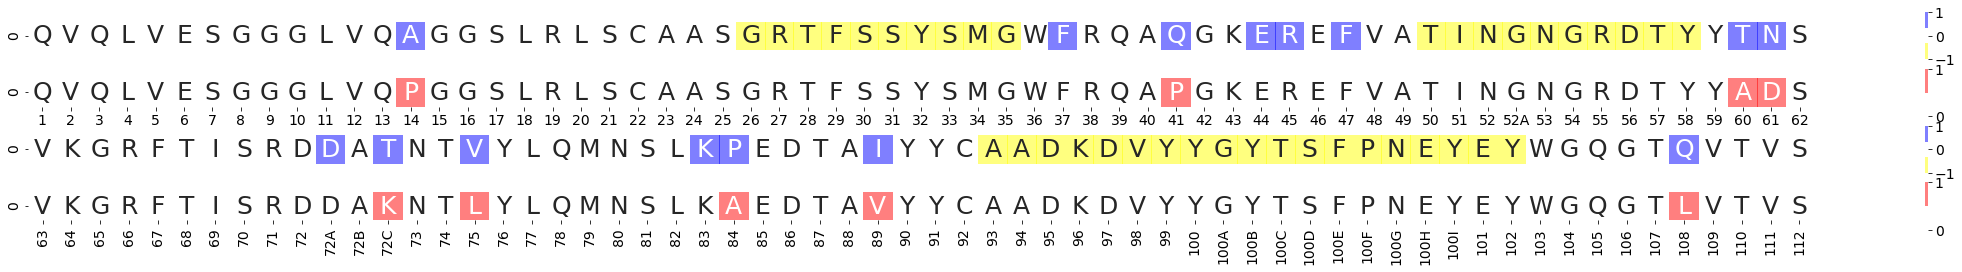

In [390]:
for threshold in [0.1]:
    orginal,humanize_data,humanized_version = humanize("Humanization_RBDNbs/Nb95.txt","Humanization_RBDNbs/Nb95.pdb",threshold)

    fig,axes = plt.subplots(nrows=4,ncols=1,figsize=(40,4))
    heatmap_width = int(np.ceil(humanize_data.shape[0]/2))
    sns.heatmap(humanize_data['label'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[0],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp2,
                vmax=1,vmin=0,
                ax=axes[1],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[:heatmap_width])

    sns.heatmap(humanize_data['label'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[2],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp2,vmax=1,vmin=0,
                ax=axes[3],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[heatmap_width:])
    plt.savefig(f"Humanization_RBDNbs/Nb95_{threshold}.svg",format='svg')
    print(humanized_version)



## Nb105

EVQLVESGGGLVQPGGSLRLSCAASGRTFSTYGMAWFRQAPGKGRDFVATITRSGETTLYADSVKGRFTISRDNAKNTLYLQMNSLKAEDTAVYYCAVRRDSSWGYSRDLFEYDYWGQGTLVTVS


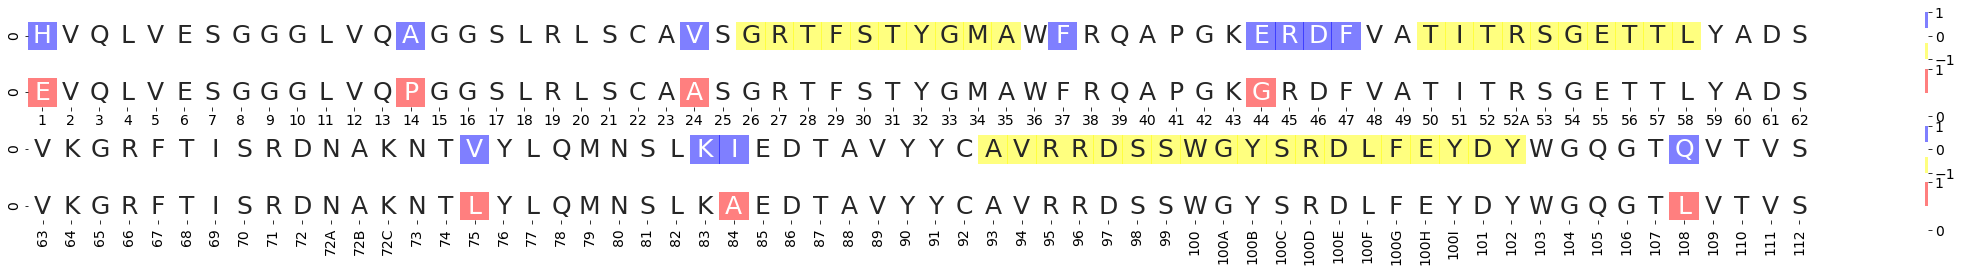

In [391]:
for threshold in [0.1]:
    orginal,humanize_data,humanized_version = humanize("Humanization_RBDNbs/Nb105.txt","Humanization_RBDNbs/Nb105.pdb",threshold)

    fig,axes = plt.subplots(nrows=4,ncols=1,figsize=(40,4))
    heatmap_width = int(np.ceil(humanize_data.shape[0]/2))
    sns.heatmap(humanize_data['label'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[0],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp2,
                vmax=1,vmin=0,
                ax=axes[1],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[:heatmap_width])

    sns.heatmap(humanize_data['label'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[2],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp2,vmax=1,vmin=0,
                ax=axes[3],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[heatmap_width:])
    plt.savefig(f"Humanization_RBDNbs/Nb105_{threshold}.svg",format='svg')
    print(humanized_version)



## Nb36

EVQLVESGGGLVQPGGSLRLSCAASGRTFSSETMDMGWFRQAPGKGREFVAADSWNDGSTYYADSVKGRFTISRDNAKNTLYLQMNSLKAEDTAVYYCAAETYSIYEKDDSWGYWGQGTLVTVS


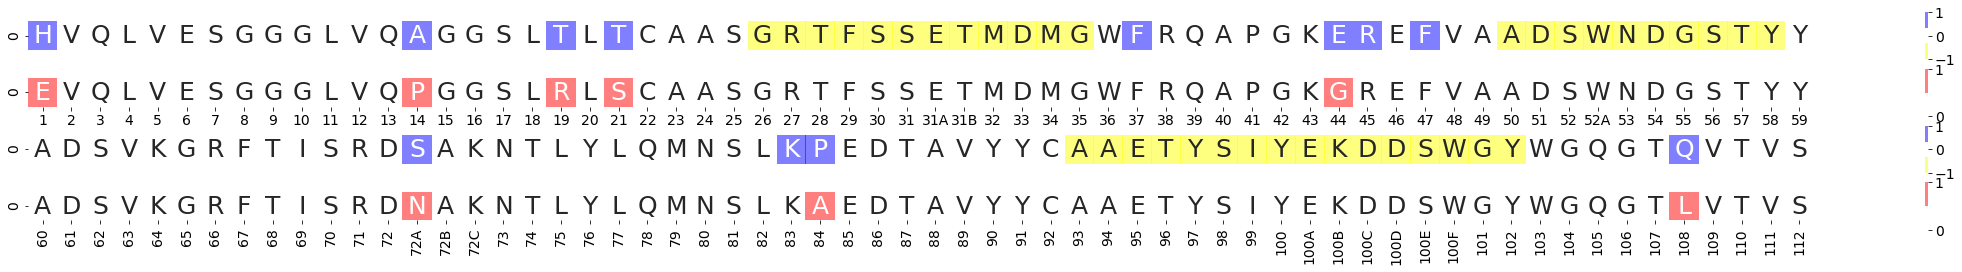

In [395]:
for threshold in [0.1]:
    orginal,humanize_data,humanized_version = humanize("Humanization_RBDNbs/Nb36.txt","Humanization_RBDNbs/Nb36.pdb",threshold)

    fig,axes = plt.subplots(nrows=4,ncols=1,figsize=(40,4))
    heatmap_width = int(np.ceil(humanize_data.shape[0]/2))
    sns.heatmap(humanize_data['label'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[0],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp2,
                vmax=1,vmin=0,
                ax=axes[1],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[:heatmap_width])

    sns.heatmap(humanize_data['label'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[2],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp2,vmax=1,vmin=0,
                ax=axes[3],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[heatmap_width:])
    plt.savefig(f"Humanization_RBDNbs/Nb36_{threshold}.svg",format='svg')
    print(humanized_version)





## Nb93

EVQLVESGGGLVQPGGSLRLSCAASGFTFSSYAMSWVRQAPGKGREWVAGITPGSGTFYADSVKGRFTISRDNAKNTLYLEMNSLKAEDTALYYCAKCRQEFSWDFSSRDPDDFDYWGQGTLVTVS


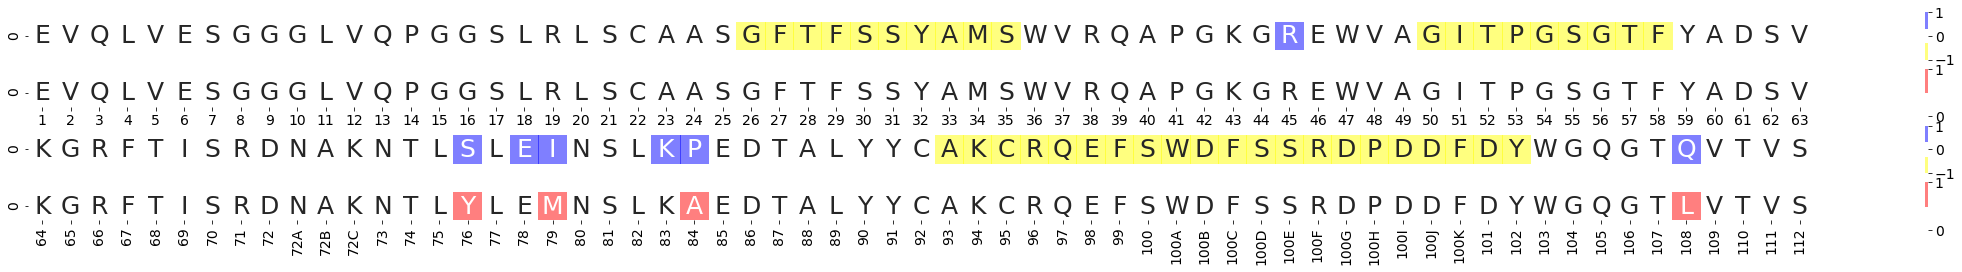

In [397]:
for threshold in [0.1]:
    orginal,humanize_data,humanized_version = humanize("Humanization_RBDNbs/Nb93.txt","Humanization_RBDNbs/Nb93.pdb",threshold)

    fig,axes = plt.subplots(nrows=4,ncols=1,figsize=(40,4))
    heatmap_width = int(np.ceil(humanize_data.shape[0]/2))
    sns.heatmap(humanize_data['label'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[0],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[:heatmap_width].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[:heatmap_width].reshape(1,-1),
               cmap=newcmp2,
                vmax=1,vmin=0,
                ax=axes[1],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[:heatmap_width])

    sns.heatmap(humanize_data['label'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp,vmax=1,vmin=-1,ax=axes[2],xticklabels=[],square=True,annot_kws={"size":25})
    sns.heatmap(humanize_data['humanized'].values[heatmap_width:].reshape(1,-1),
                fmt='s',annot= humanize_data['humanized_aa'].values[heatmap_width:].reshape(1,-1),
               cmap=newcmp2,vmax=1,vmin=0,
                ax=axes[3],square=True,annot_kws={"size":25},xticklabels=humanize_data['pos'].values[heatmap_width:])
    plt.savefig(f"Humanization_RBDNbs/Nb93_{threshold}.svg",format='svg')
    print(humanized_version)





In [308]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [344]:
grey = cm.get_cmap('Greys', 256)
newcolors = grey(np.linspace(0, 1, 3))
blue = np.array([0, 0, 1, 0.5])
red = np.array([1, 0, 0, 0.5])
white = np.array([1,1,1,0])
yellow = np.array([1, 1, 0, 0.5])
newcolors[2:3, :] = blue
newcolors[1:2, :] = white
newcolors[:1, :] = yellow
newcmp = ListedColormap(newcolors)

newcolors2 = grey(np.linspace(0, 1, 2))
newcolors2[1:2, :] = red
newcolors2[:1, :] = white
newcmp2 = ListedColormap(newcolors2)




